In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import lsst.sims.skybrightness_pre as sb
import healpy as hp
import lsst.sims.skybrightness as sb1

In [2]:
sm = sb.SkyModelPre(opsimFields=True)

In [12]:
mjd = 59580.10837963
fieldID = 1242
sm.returnMags(mjd, np.array([1242]), badval=float('nan'), extrapolate=True)

{'g': array([ nan]),
 'i': array([ nan]),
 'r': array([ nan]),
 'u': array([ nan]),
 'y': array([ nan]),
 'z': array([ nan])}

In [13]:
np.degrees(np.arccos(1./sm.returnAirmass(mjd, indx=np.array([1242]))))

array([ 4.32910621])

In [7]:
sm.returnAirmass(mjd, indx=np.array([1242]))

array([ 1.00286125])

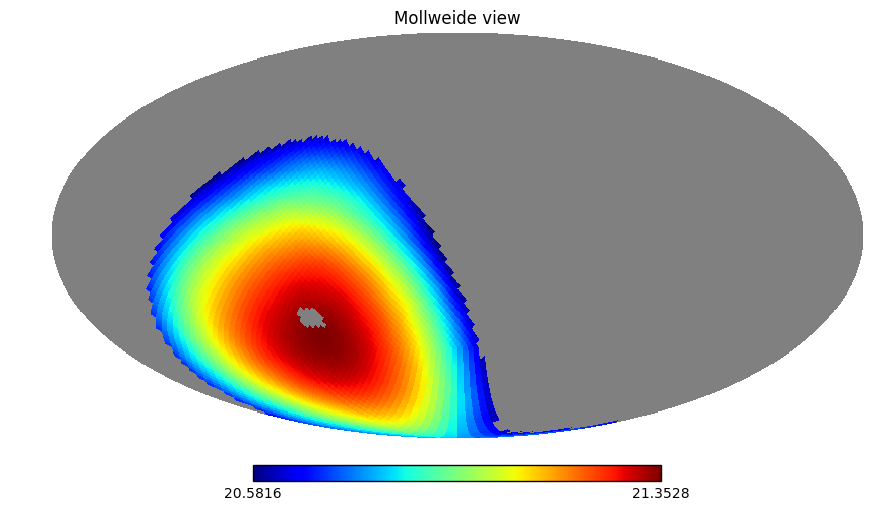

In [20]:
sm = sb.SkyModelPre()
mags = sm.returnMags(59580.10837963)
hp.mollview(mags['r'])

In [2]:
sm = sb.SkyModelPre(preload=False)

In [3]:
mjd = 60364.0208333333#59760. #60364.0208333333
ra = 60.217225
dec = 29.40758

In [4]:
mags = sm.returnMags(mjd)

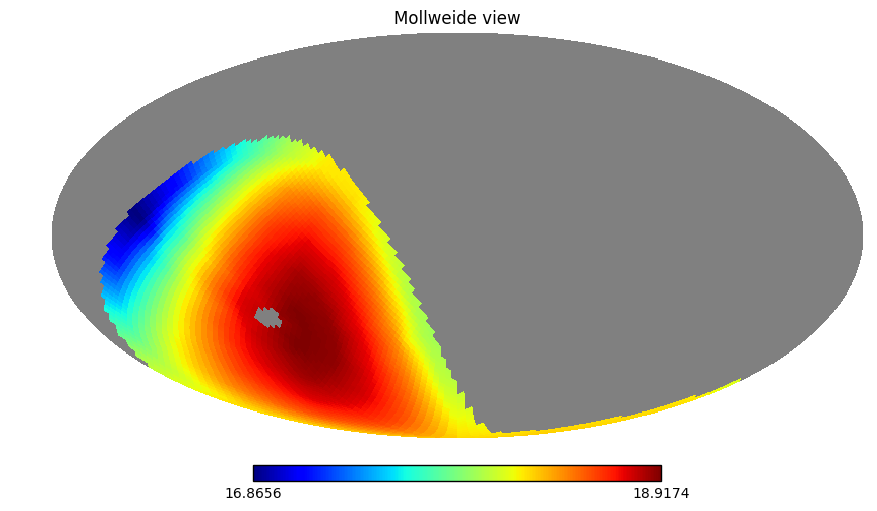

In [5]:
hp.mollview(mags['r'])

In [6]:
airmasses = sm.returnAirmass(mjd)
good = np.where((airmasses > 2.8) & (airmasses < 4.))
outliers = sm.returnMags(mjd, indx=good, extrapolate=True)


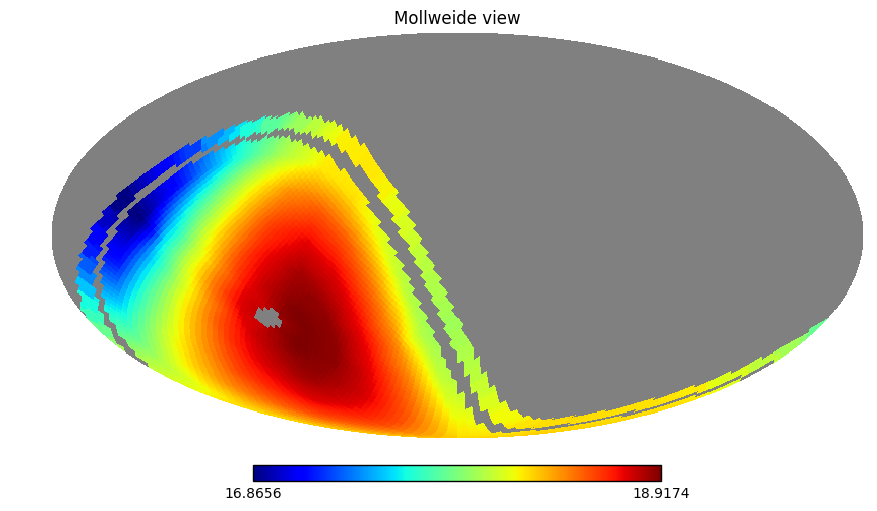

In [7]:
extend_mags = mags['r'].copy()
extend_mags[good] = outliers['r']
hp.mollview(extend_mags)

In [7]:
left = np.searchsorted(sm.info['mjds'], mjd)-1
right = left+1

In [8]:
nside = hp.npix2nside(mags['z'].size)
lat, ra = hp.pix2ang(nside, np.arange(mags['z'].size))
dec = np.pi/2-lat

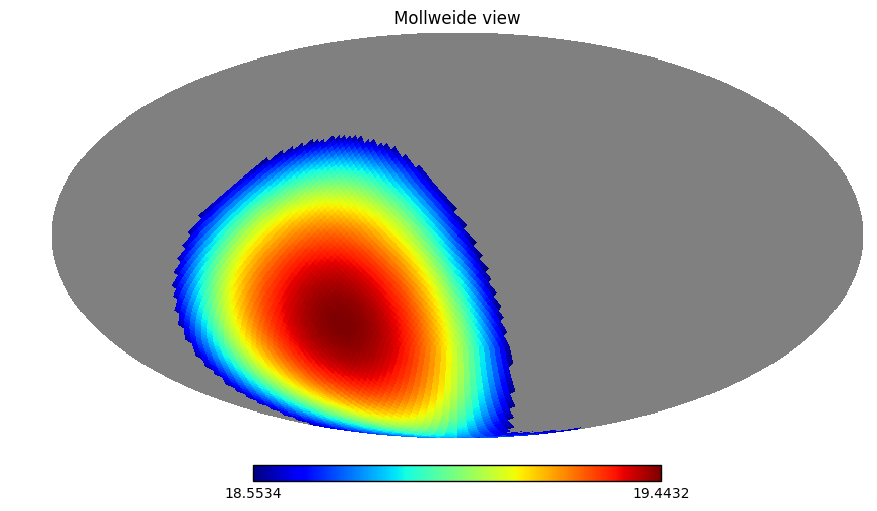

In [9]:
hp.mollview(sm.sb['z'][10,:])

In [10]:
sm2 = sb1.SkyModel(observatory='LSST', mags=True)
sm2.setRaDecMjd(ra,dec,mjd)

/Users/yoachim/lsst/DarwinX86/healpy/1.8.1.lsst2+5/lib/python/healpy-1.8.1-py2.7-macosx-10.5-x86_64.egg/healpy/pixelfunc.py:1045: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if phi == None:


In [11]:
mags = sm2.returnMags()

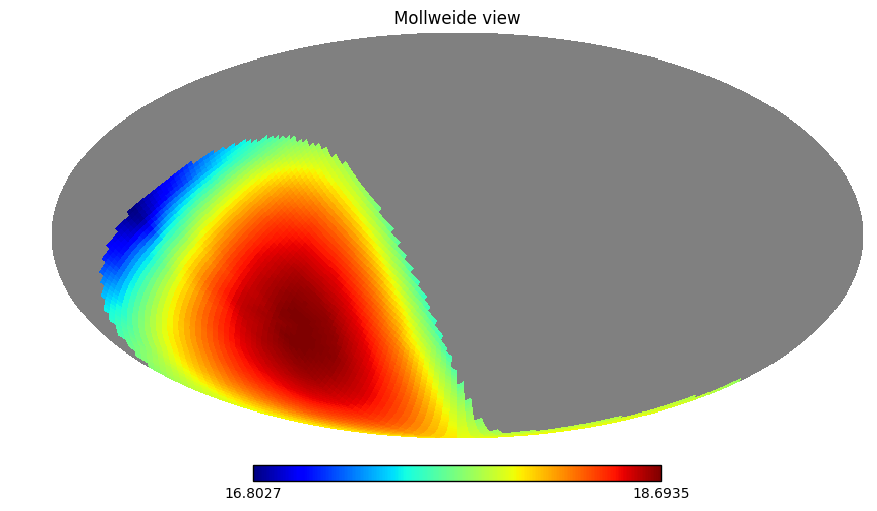

In [12]:
hp.mollview(mags['z'])